In [564]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.stats as stat
import pylab

In [565]:
df = pd.read_csv('diabetes.csv')

In [566]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [567]:
df[df['BMI']<12].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0


In [568]:
df[df['BloodPressure']<=0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1


In [569]:
d =df[df['BloodPressure']==0]
d[d['Outcome']==0]
ind =d.index[d['Outcome']==0].tolist()
df=df.drop(index=ind,axis=0)

In [570]:
df[df['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
15,7,100,0,0,0,30.0,0.484,32,1
78,0,131,0,0,0,43.2,0.270,26,1
193,11,135,0,0,0,52.3,0.578,40,1
261,3,141,0,0,0,30.0,0.761,27,1
266,0,138,0,0,0,36.3,0.933,25,1
269,2,146,0,0,0,27.5,0.240,28,1
300,0,167,0,0,0,32.3,0.839,30,1
332,1,180,0,0,0,43.3,0.282,41,1
357,13,129,0,30,0,39.9,0.569,44,1
435,0,141,0,0,0,42.4,0.205,29,1


In [571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               749 non-null    int64  
 1   Glucose                   749 non-null    int64  
 2   BloodPressure             749 non-null    int64  
 3   SkinThickness             749 non-null    int64  
 4   Insulin                   749 non-null    int64  
 5   BMI                       749 non-null    float64
 6   DiabetesPedigreeFunction  749 non-null    float64
 7   Age                       749 non-null    int64  
 8   Outcome                   749 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 58.5 KB


In [572]:
df.duplicated().sum()

0

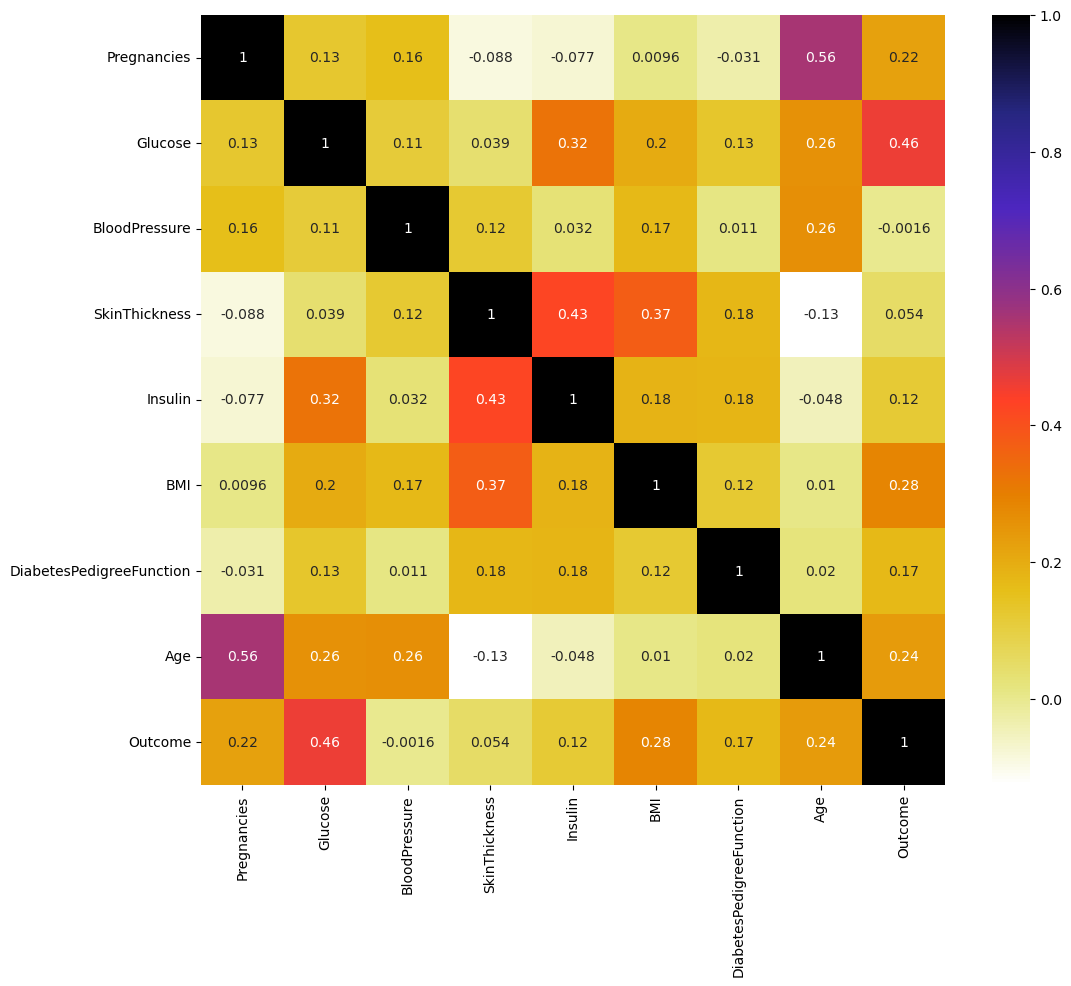

In [573]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr,annot = True,cmap=plt.cm.CMRmap_r)
plt.show()

In [574]:
df = df.drop(columns=['SkinThickness','BloodPressure'],axis=1)
df.duplicated().sum()

0

In [575]:
df.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


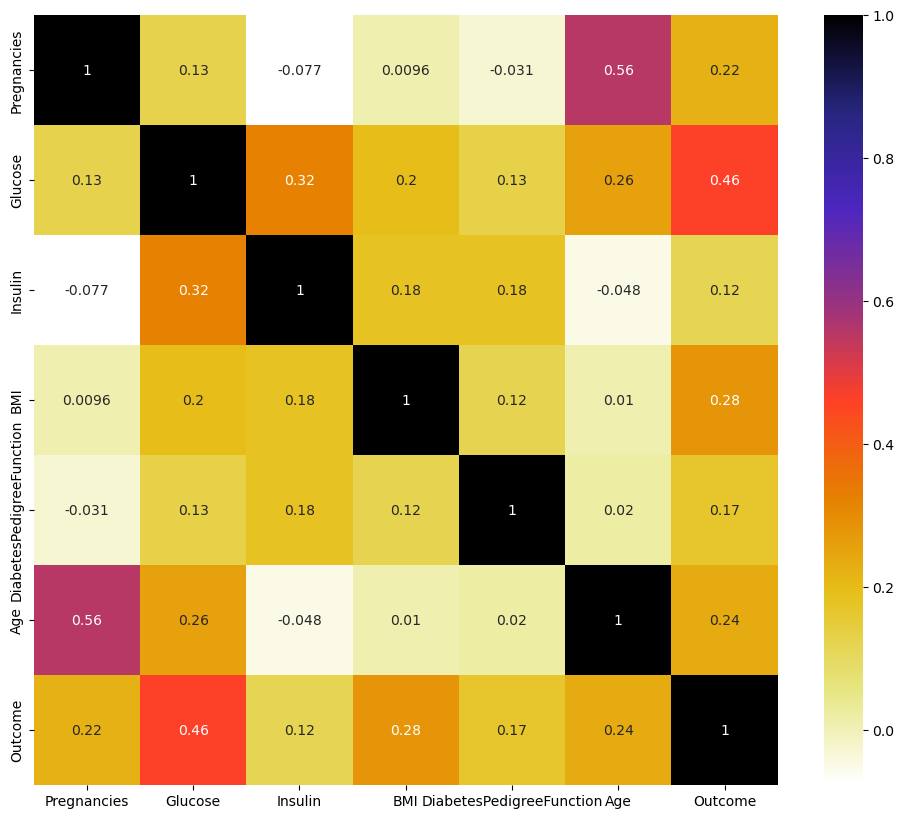

In [576]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr,annot = True,cmap=plt.cm.CMRmap_r)
plt.show()

In [577]:
cols=['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

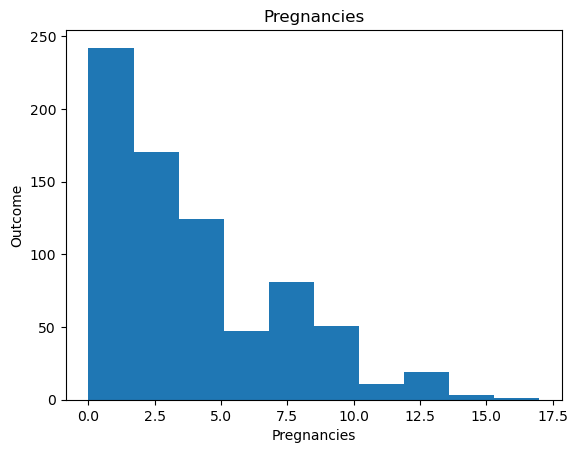

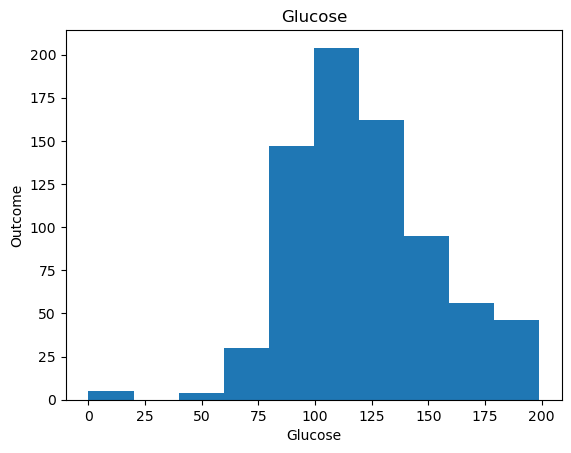

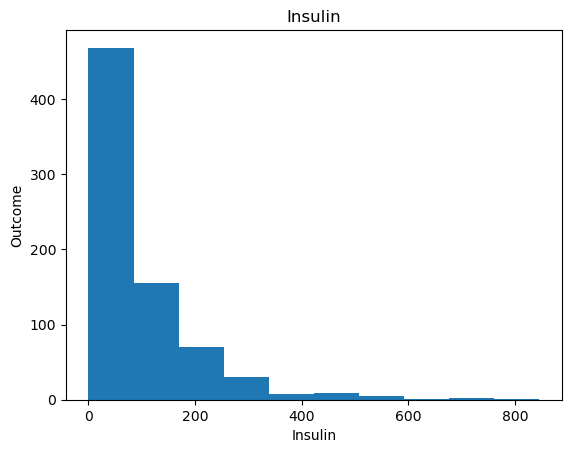

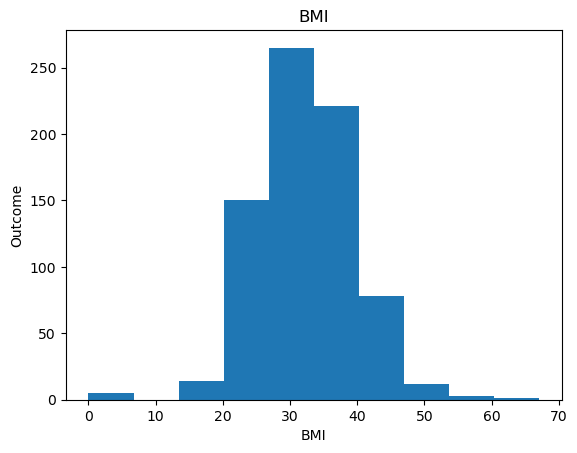

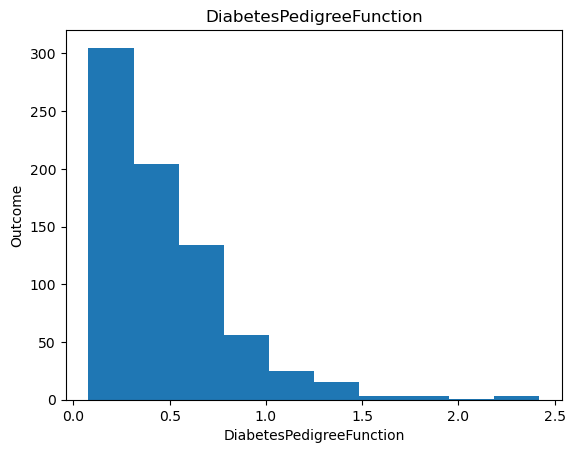

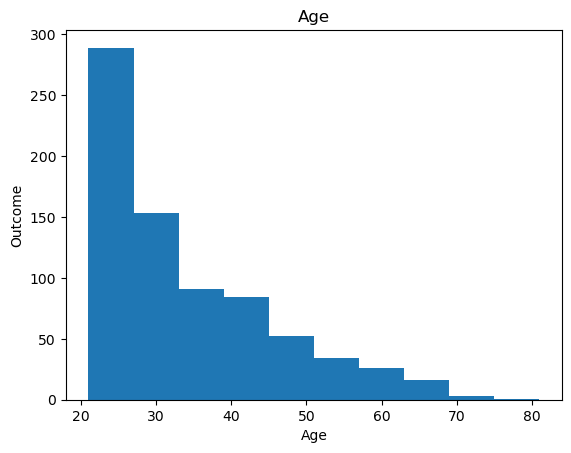

In [578]:
for label in cols[:-1]:
    plt.hist(df[label])
    plt.title(label)
    plt.ylabel('Outcome')
    plt.xlabel(label)
    plt.show()

In [579]:
df['Pregnancies'].value_counts()

Pregnancies
1     135
0     107
2      97
3      73
4      67
5      57
6      47
7      43
8      38
9      28
10     23
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

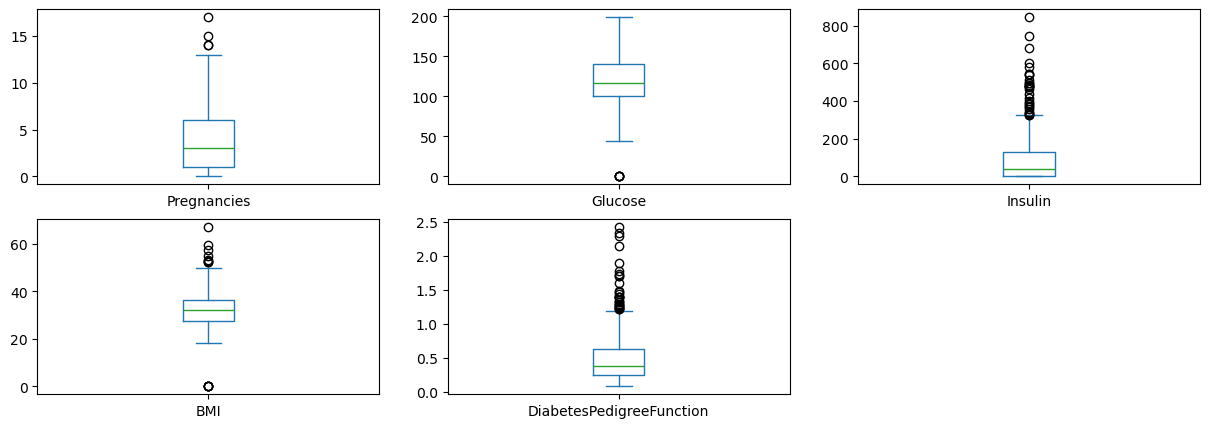

In [580]:
for i in range(1,6):
    plt.subplot(2, 3, i)
    df[cols[i-1]].plot.box(figsize=(15,5))

In [581]:
def clean_outlier(col,outlier,df ):
    for i in outlier :
        ind =df.index[df[col]==i].tolist()
        df=df.drop(index=ind,axis=0)
    return df

In [582]:
df = clean_outlier('Pregnancies',[14,15,17],df)
df = clean_outlier('Glucose',[0],df)
df = clean_outlier('BMI',[0],df)

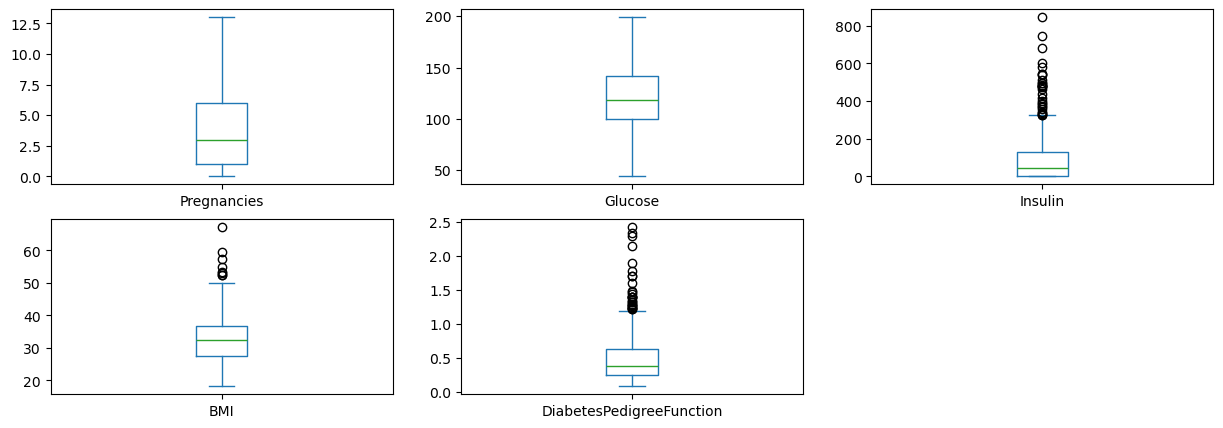

In [583]:
for i in range(1,6):
    plt.subplot(2, 3, i)
    df[cols[i-1]].plot.box(figsize=(15,5))

In [584]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.title('Histogram of '+feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title('Probability Plot of '+feature)
    plt.show()


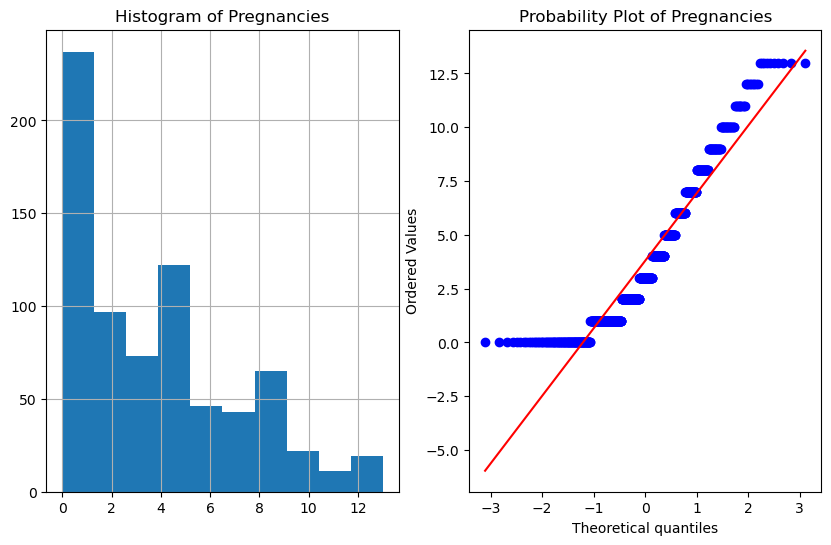

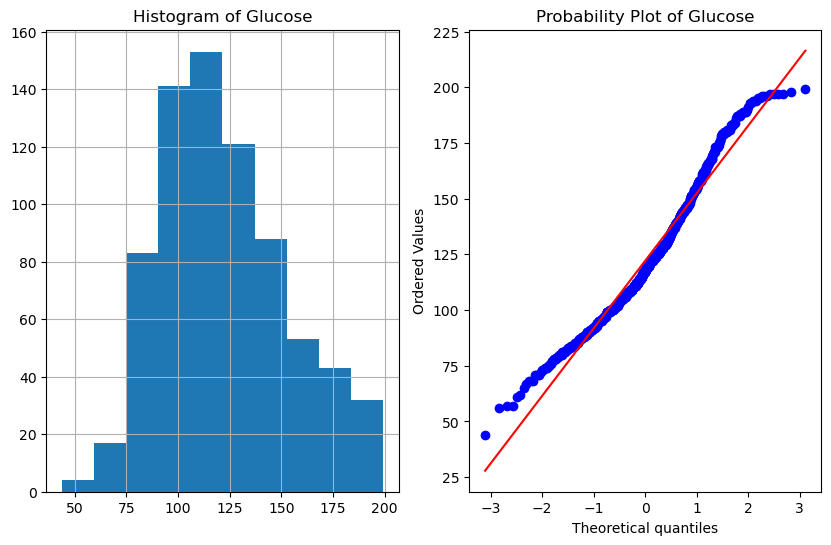

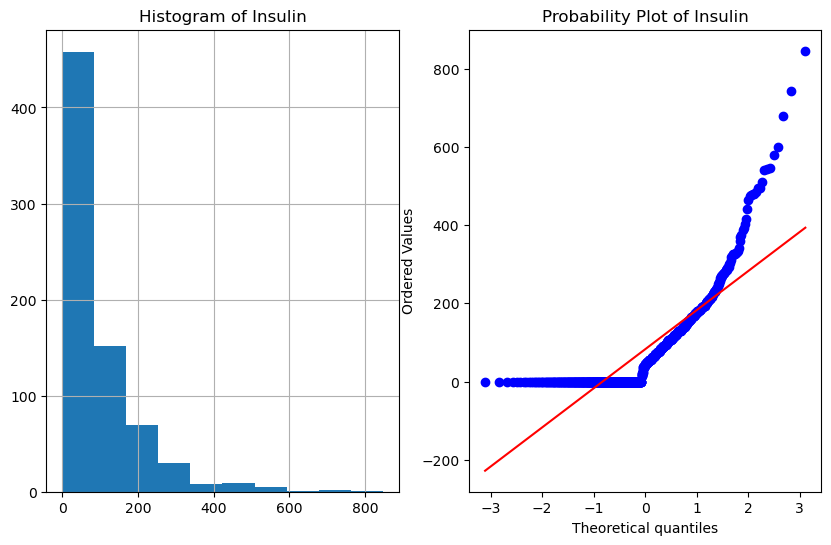

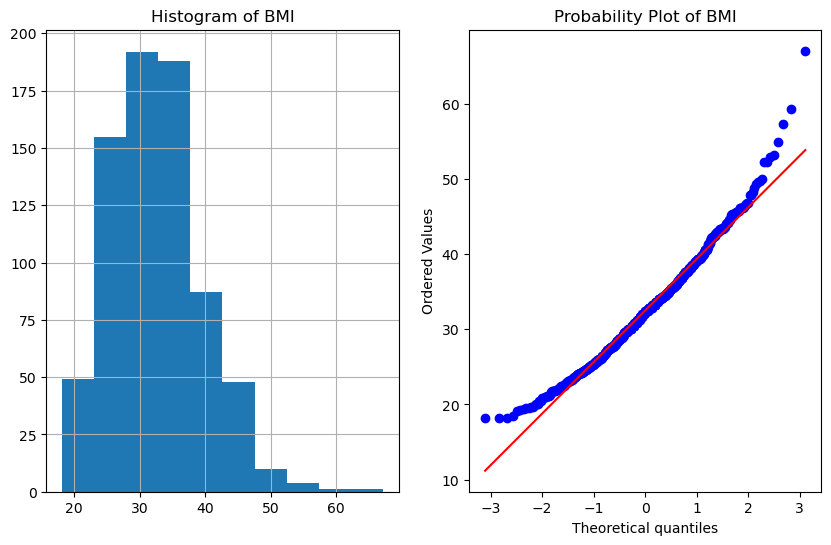

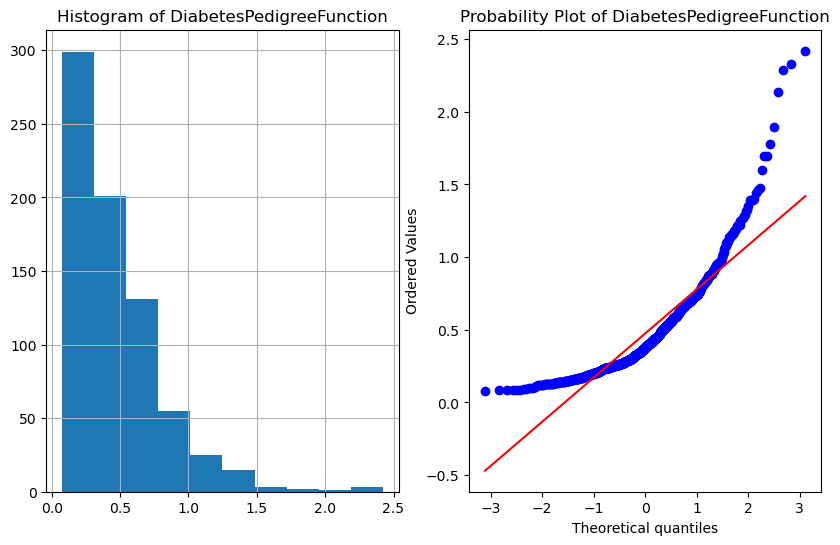

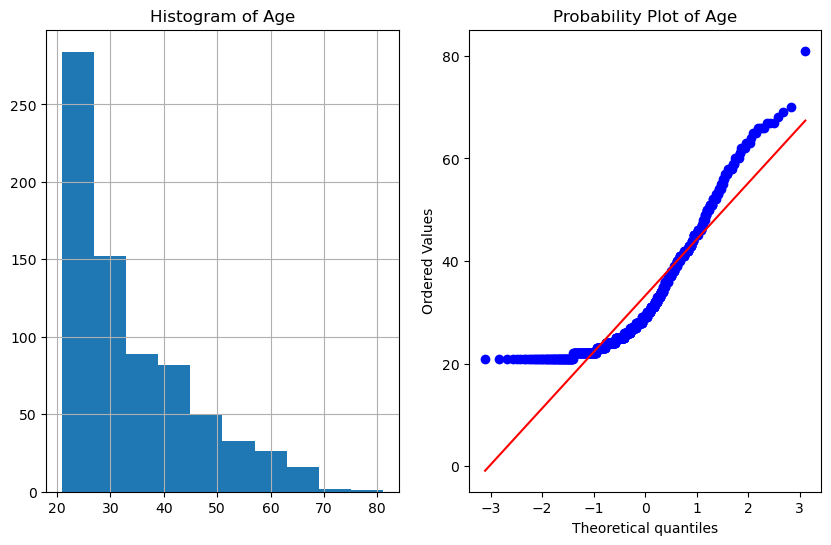

In [585]:
for label in cols[:-1]:
    plot_data(df,label)

In [587]:
df['Age'] = np.log(df['Age'])

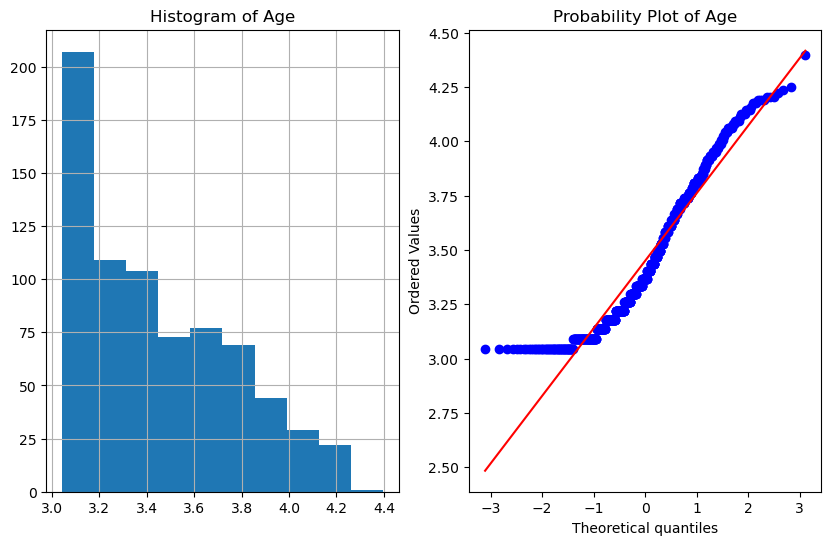

In [588]:
plot_data(df,'Age')

In [589]:
df['DiabetesPedigreeFunction'] = np.log(df['DiabetesPedigreeFunction'])

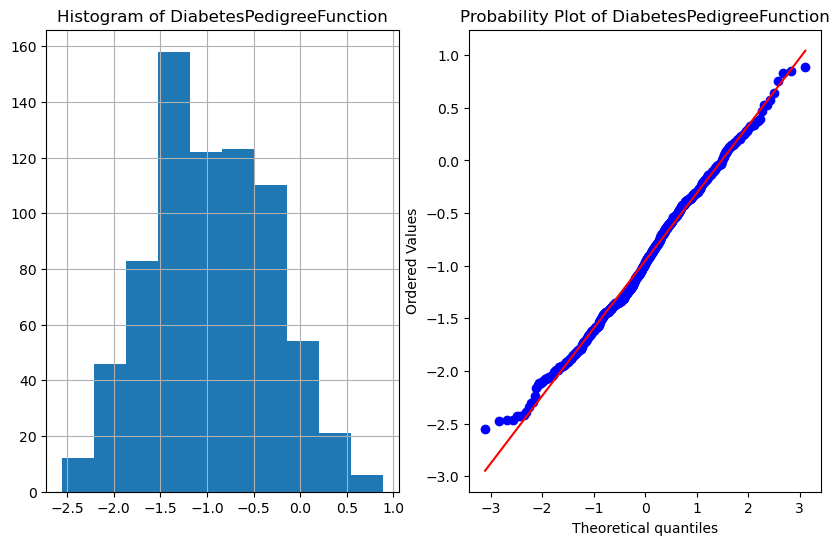

In [590]:
plot_data(df,'DiabetesPedigreeFunction')

In [591]:
df['BMI'] = np.log(df['BMI'])

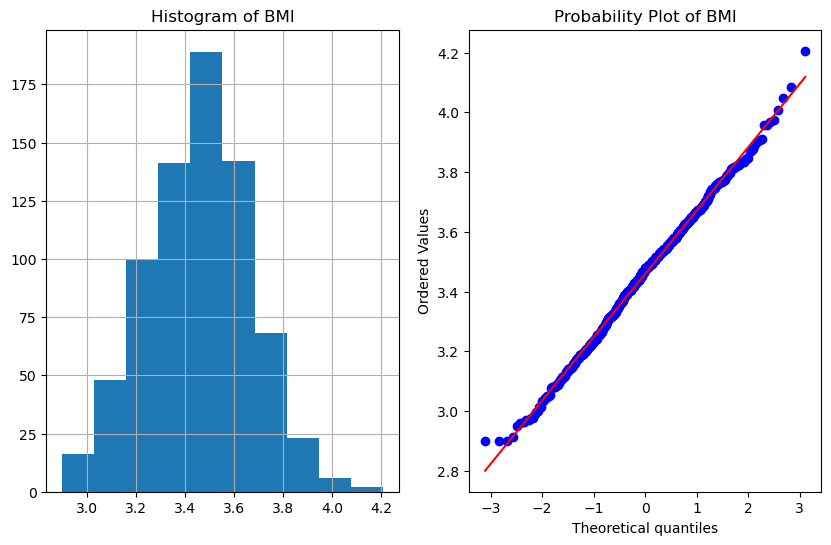

In [592]:
plot_data(df,'BMI')

In [593]:
df['Insulin'],parameters = stat.boxcox(df['Insulin'])

ValueError: Data must be positive.

ValueError: supplied range of [-inf, 6.740519359606223] is not finite

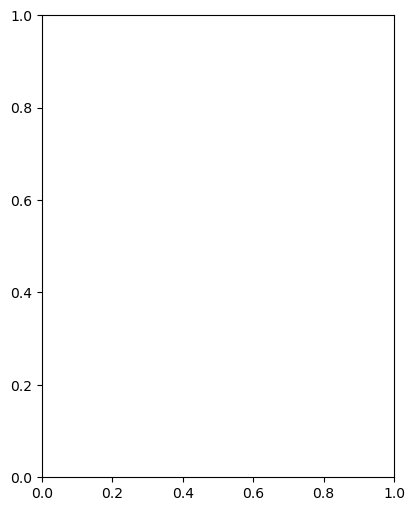

In [ ]:
plot_data(df,'Insulin')